In [5]:
import numpy as np
import re, itertools
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [6]:
# load the text book in from file
with open('Alice.txt', 'r', encoding='utf8') as rf:
    text = rf.read()

In [7]:
text = text[text.find("CHAPTER I.")+len("CHAPTER I."):text.find("END OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND")].strip()

In [37]:
#Split the text into chapter and paragraph
Chapters = re.split(r"CHAPTER \w+\.", text)[1:]

#Split Paragraph
Paragraphs = text.split("\n")


In [40]:
#Load and read Charectors
with open('charecter2.txt', 'r', encoding= 'utf8') as rf:
    Charectors = rf.read().split("\n")
    Charectors = [Charectors.split(", ") for Charectors in Charectors]

In [41]:
print(Charectors)

[['Alice'], ['White Rabbit'], ['Mouse'], ['Dodo'], ['Lory'], ['Eaglet'], ['Duck'], ['Pat'], ['Bill'], ['puppy'], ['Caterpillar'], ['Duchess'], ['Cheshire Cat'], ['Hatter'], ['March Hare'], ['Dormouse'], ['Queen'], ['King'], ['Knave'], ['Gryphon'], ['Mock Turtle']]


In [42]:
#Edge Information
Charector_in_dic = dict()


for chapter in Paragraphs:
    observe = []
    for charactor in Charectors:
        for name in charactor:
            if name in chapter:
                observe.append(charactor[0])
                break
    relationship = itertools.combinations(sorted(observe),2)
    for relation in relationship:
        if relation in Charector_in_dic:
            Charector_in_dic[relation] += 1
        else:
            Charector_in_dic[relation] = 1 

In [43]:
print( Charector_in_dic)

{('Alice', 'Duchess'): 5, ('Alice', 'Mouse'): 5, ('Alice', 'Dodo'): 2, ('Alice', 'Eaglet'): 1, ('Alice', 'Lory'): 1, ('Dodo', 'Eaglet'): 1, ('Dodo', 'Lory'): 1, ('Eaglet', 'Lory'): 1, ('Alice', 'Bill'): 1, ('Alice', 'puppy'): 1, ('Alice', 'Caterpillar'): 2, ('Dormouse', 'Hatter'): 4, ('Dormouse', 'March Hare'): 3, ('Hatter', 'March Hare'): 4, ('Alice', 'Dormouse'): 5, ('Alice', 'Hatter'): 2, ('Alice', 'March Hare'): 1, ('Alice', 'Queen'): 7, ('King', 'Queen'): 5, ('Alice', 'White Rabbit'): 2, ('Knave', 'Queen'): 1, ('Alice', 'King'): 4, ('Alice', 'Cheshire Cat'): 1, ('Alice', 'Mock Turtle'): 3, ('Mock Turtle', 'Queen'): 1, ('Alice', 'Gryphon'): 6, ('Gryphon', 'Queen'): 1, ('Gryphon', 'Mock Turtle'): 2, ('King', 'White Rabbit'): 3, ('Hatter', 'King'): 2, ('Hatter', 'Queen'): 2, ('Dormouse', 'Queen'): 1}


In [44]:
#weigh
G = nx.Graph()

for charactor in Charectors:
    G.add_node(charactor[0])

for edge, weight in Charector_in_dic.items():
    G.add_edge(edge[0], edge[1], weight=weight)

print(G.edges().data())   

[('Alice', 'Duchess', {'weight': 5}), ('Alice', 'Mouse', {'weight': 5}), ('Alice', 'Dodo', {'weight': 2}), ('Alice', 'Eaglet', {'weight': 1}), ('Alice', 'Lory', {'weight': 1}), ('Alice', 'Bill', {'weight': 1}), ('Alice', 'puppy', {'weight': 1}), ('Alice', 'Caterpillar', {'weight': 2}), ('Alice', 'Dormouse', {'weight': 5}), ('Alice', 'Hatter', {'weight': 2}), ('Alice', 'March Hare', {'weight': 1}), ('Alice', 'Queen', {'weight': 7}), ('Alice', 'White Rabbit', {'weight': 2}), ('Alice', 'King', {'weight': 4}), ('Alice', 'Cheshire Cat', {'weight': 1}), ('Alice', 'Mock Turtle', {'weight': 3}), ('Alice', 'Gryphon', {'weight': 6}), ('White Rabbit', 'King', {'weight': 3}), ('Dodo', 'Eaglet', {'weight': 1}), ('Dodo', 'Lory', {'weight': 1}), ('Lory', 'Eaglet', {'weight': 1}), ('Hatter', 'Dormouse', {'weight': 4}), ('Hatter', 'March Hare', {'weight': 4}), ('Hatter', 'King', {'weight': 2}), ('Hatter', 'Queen', {'weight': 2}), ('March Hare', 'Dormouse', {'weight': 3}), ('Dormouse', 'Queen', {'weight

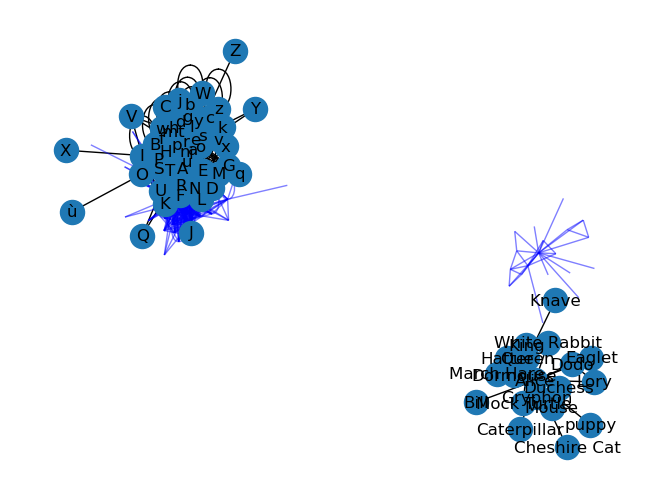

In [51]:
#plot
nx.draw(G,with_labels=True)
nx.draw_networkx_edges(G, pos=pos, width=1, alpha=0.5, edge_color='b')

plt.show()

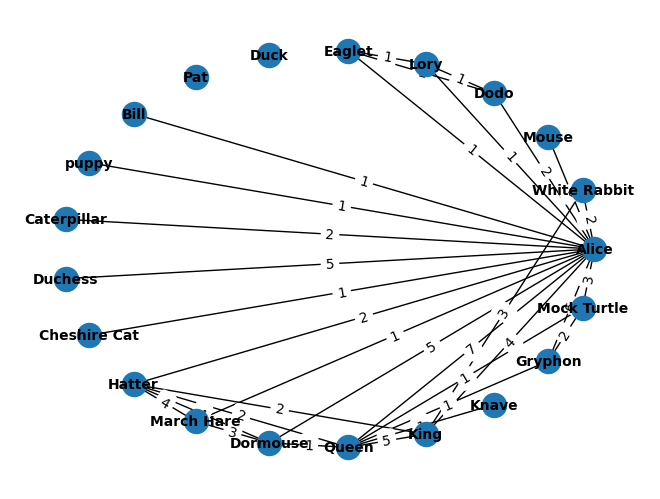

In [46]:

#Use circular layout

pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


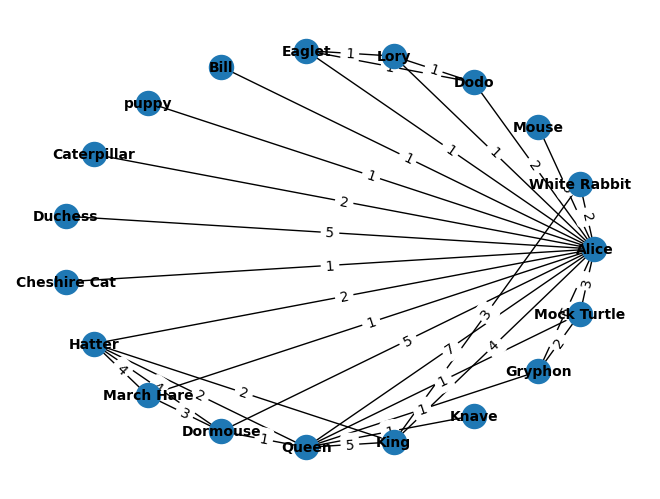

In [47]:

#remove Isolated node
isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


TypeError: draw_networkx_edge_labels() got an unexpected keyword argument 'edge_attr'

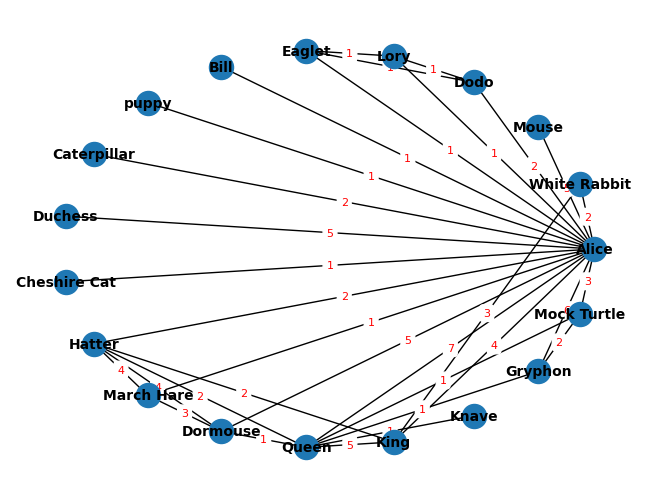

In [48]:
pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_color='r')

# adjust the positions of edge labels
for _, t in edge_labels.items():
    t.set_rotation('horizontal')
    t.set_ha('center')
    t.set_va('center')

# draw curved edges
for u, v, d in G.edges(data=True):
    c = (pos[u] + pos[v]) / 2
    dist = np.sqrt((pos[u][0] - pos[v][0])**2 + (pos[u][1] - pos[v][1])**2)
    rad = dist / 2
    x, y = c[0] - rad, c[1] - rad
    width = d['weight'] / 5
    nx.draw_networkx_edge_labels(G, pos, edge_labels={ (u,v): d['weight'] }, 
                                 font_size=8, font_color='r', 
                                 label_pos=0.5, edge_attr={'alpha':0}, ax=plt.gca())
    nx.draw(G, pos, edgelist=[(u,v)], width=width, edge_color='k', style='solid', 
            alpha=0.3, ax=plt.gca(), with_labels=False, node_size=1)
    
plt.show()
